### CLIP (Contrastive Language-Image Pretraining)

In [1]:
# git repository를 통한 CLIP 설치
# 방법 1: git을 통한 설치 (git이 설치되어 있어야 함)
# %pip install git+https://github.com/openai/CLIP.git

# 방법 2: PyPI를 통한 설치 (추천 - git 불필요)
%pip install openai-clip

# 방법 3: ftfy, regex, tqdm 의존성과 함께 설치
# %pip install ftfy regex tqdm
# %pip install git+https://github.com/openai/CLIP.git

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install openai-clip

In [3]:
# model 활용
import torch
import clip

device = "cuda" if torch.cuda.is_available() else "cpu"
model, processor = clip.load("ViT-B/32", device=device)

c:\Users\Playdata\anaconda3\envs\llm_env\Lib\site-packages\clip\clip.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import packaging


In [4]:
# 이미지 전처리 및 캡션 옵션 생성
from PIL import Image

image = processor(Image.open("./test.jpg")).unsqueeze(0).to(device)
caption_options = [
    "a dog on the grass",
    "a cat on the grass",
    "a pug sitting",
    "a cat on the table"
]

captions = clip.tokenize(caption_options).to(device)


In [5]:
with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(captions)

    logits_per_image, _ = model(image, captions)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print(image_features)
print(text_features)
print("CLIP이 뽑은 Best Caption: ", caption_options[probs.argmax()])

tensor([[-4.4154e-02, -4.1777e-01,  3.4204e-01, -6.9775e-01, -2.2052e-01,
         -3.8078e-01,  3.3212e-01, -4.1782e-02,  4.4896e-01, -9.7157e-03,
          3.5054e-01, -1.3892e-01,  1.6868e-01, -3.2045e-01,  3.9935e-01,
          1.1216e-01,  1.3774e+00,  9.4572e-03,  1.8128e-01,  2.4342e-01,
         -2.4954e-01,  2.3426e-02,  4.7222e-01, -3.1134e-01, -3.9135e-01,
          2.5626e-01,  3.8579e-01,  3.3425e-01,  1.1728e-01, -2.9025e-01,
          3.8952e-01,  6.3405e-02,  2.8503e-01,  4.5298e-01,  3.1259e-01,
          5.1503e-02,  8.0825e-02, -7.4219e-02, -1.8510e-01,  1.7809e+00,
         -3.1038e-01, -2.8929e-01, -2.3549e-01, -3.3841e-01, -1.4567e-01,
          1.6147e-01, -3.4652e-01,  7.8862e-02, -3.8549e-02, -2.7587e-01,
         -3.0449e-01,  4.8839e-01,  1.9370e-02, -1.4523e-01, -1.7257e-01,
         -2.1644e-01,  4.2867e-01,  5.4015e-01, -1.1154e-01, -3.4096e-01,
          1.5755e+00,  1.6230e-01, -1.8305e-01,  8.8736e-02, -1.2337e-01,
         -5.3114e-01,  2.1084e-01,  4.

### BLIP (Bootstrapped Language-Image Pretraining)

CLIP과 BLIP의 차이점을 표로 정리하면 다음과 같습니다.
| 구분           | CLIP                                              | BLIP                                                |
|---------------|--------------------------------------------------|-----------------------------------------------------|
| 목적           | 이미지-텍스트 매칭, 이미지 분류, 검색 등          | 이미지 캡셔닝, 비주얼 질의응답, 텍스트 기반 이미지 검색 등 |
| 학습 방법      | 대조학습(Contrastive Learning), 대규모 데이터에서 이미지와 텍스트를 짝지어 학습 | Bootstrapped 학습: 노이즈가 있는 이미지-텍스트 쌍을 정제한 뒤, self-training 및 bootstrap 사용 |
| 입력           | 이미지, 텍스트 쌍                                 | 이미지, 텍스트 쌍                                   |
| 아키텍처      | Vision Transformer + Text Transformer             | Vision Transformer + Q-Former(쿼리 Transformer)+ 텍스트 디코더 등 |
| 장점           | 범용적, 이미지-텍스트 멀티모달 표현 학습에 강점    | 다양한 비전-언어 태스크(캡셔닝, VQA 등)에서 뛰어난 성능 |

요약하자면, CLIP은 이미지-텍스트의 대응 관계를 잘 학습하여 분류, 검색 등에 널리 활용되고,
BLIP은 이미지 캡셔닝, 비주얼 질의응답 등 비전-언어 멀티모달 태스크에 특화되어 있습니다.
학습 방법 또한 CLIP은 순수 대조학습에 기반하고, BLIP은 noisy label 정제 및 self-training을 통한 bootstrap이 핵심입니다.

In [8]:
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

c:\Users\Playdata\anaconda3\envs\llm_env\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Playdata\.cache\huggingface\hub\models--Salesforce--blip-image-captioning-base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

In [14]:
image = Image.open("./test.jpg").convert('RGB')
inputs = processor(images=image, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=50)

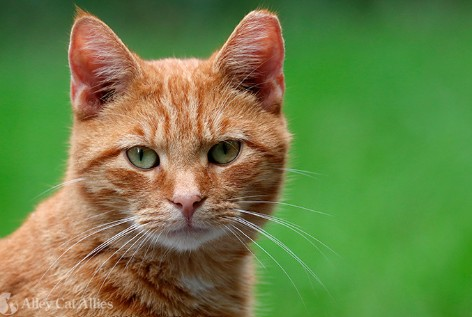

In [17]:
image

In [16]:
inputs

{'pixel_values': tensor([[[[-1.2813, -1.2813, -1.2813,  ..., -1.1207, -1.0915, -1.0769],
          [-1.2813, -1.2813, -1.2813,  ..., -1.1061, -1.0769, -1.0623],
          [-1.2813, -1.2813, -1.2813,  ..., -1.0769, -1.0623, -1.0623],
          ...,
          [ 0.7479,  0.5289,  0.6165,  ..., -0.8142, -0.7850, -0.7704],
          [ 0.7917,  0.6895,  0.6019,  ..., -0.8142, -0.7850, -0.7704],
          [ 0.8792,  0.8792,  0.7333,  ..., -0.8288, -0.7996, -0.7704]],

         [[-0.7016, -0.7016, -0.7016,  ..., -0.4014, -0.3864, -0.3864],
          [-0.7016, -0.7016, -0.7016,  ..., -0.3864, -0.3714, -0.3714],
          [-0.7016, -0.7016, -0.7016,  ..., -0.3564, -0.3564, -0.3564],
          ...,
          [ 0.0939, -0.1163, -0.0262,  ...,  0.2289,  0.2589,  0.2740],
          [ 0.0939,  0.0038, -0.1012,  ...,  0.2289,  0.2589,  0.2740],
          [ 0.1389,  0.1389, -0.0112,  ...,  0.2139,  0.2439,  0.2740]],

         [[-0.9114, -0.9114, -0.9114,  ..., -0.8972, -0.8688, -0.8688],
          [-0

In [15]:
outputs

tensor([[30522,  1037,  4937,  3564,  2006,  2327,  1997,  1037,  4799,  8638,
           102]])

In [13]:

print(processor.decode(outputs[0], skip_special_tokens=True))

a cat sitting on top of a wooden fence


In [18]:
print("BLIP이 생성한 Caption: ", processor.decode(outputs[0], skip_special_tokens=True))

BLIP이 생성한 Caption:  a cat sitting on top of a wooden fence


### 이미지 캡션 매칭 퀴즈

In [20]:
### 이미지 캡션 매칭 퀴즈

# 1. BLIP을 이용해 이미지에 적절한 캡션을 생성
# 2. OpenAI API를 이용해 (1)에서 생성한 캡션을 포함해 5개의 '보기'생성
# 3. 사용자의 선택
# 4. CLIP을 이용해 가장 유사도가 높은 캡션 매칭
# 5. 결과 출력

# - 정답/오답 여부
# - BLIP 생성 캡션
# - CLIP 매칭 캡션과 각 유사도 점수

In [23]:
# 1. BLIP을 이용해 이미지에 적절한 캡션을 생성
## BLIP 모델 초기화
from transformers import BlipProcessor, BlipForConditionalGeneration

processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

image = Image.open("./yoga.png").convert('RGB')
inputs = processor(images=image, return_tensors="pt").to(device)

outputs = model.generate(**inputs, max_new_tokens=50)

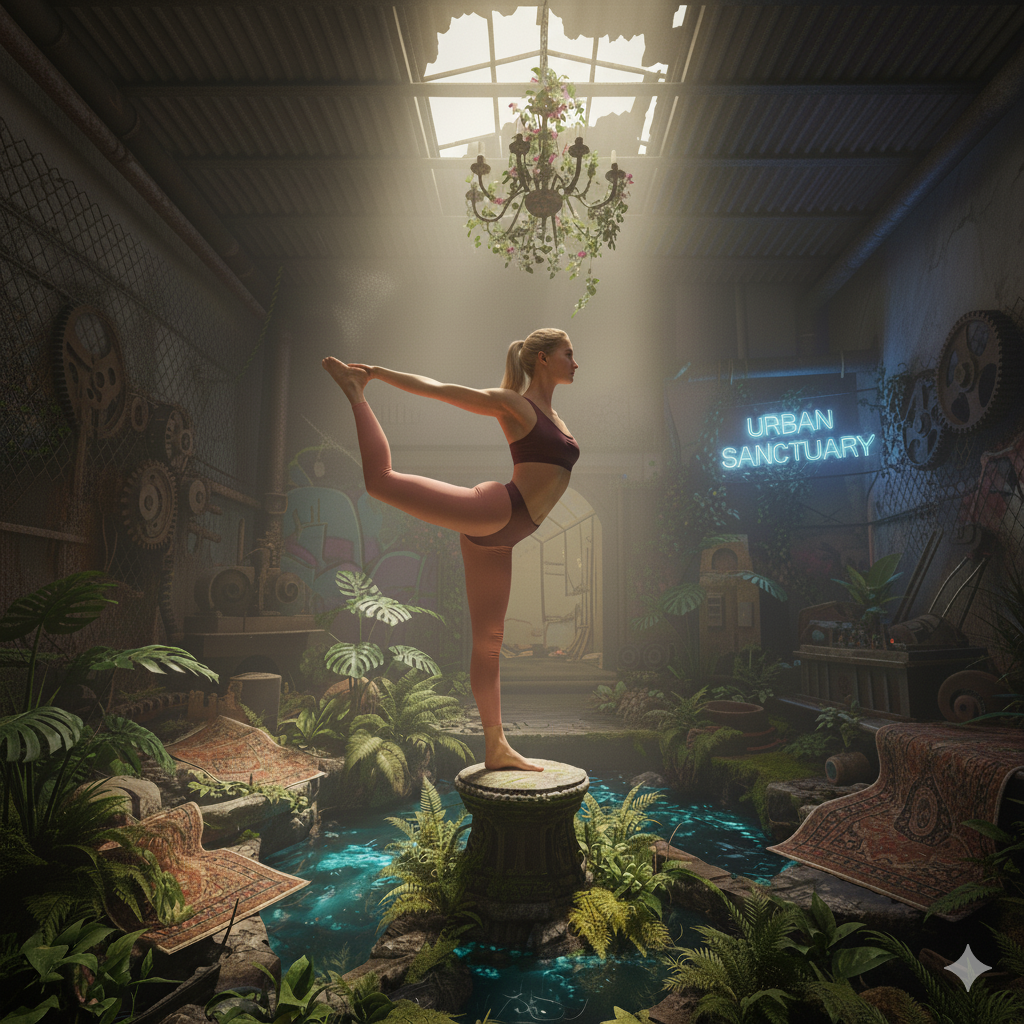

In [33]:
image

In [24]:

# BLIP 모델이 생성한 이미지에 대한 캡션 출력
print(processor.decode(outputs[0], skip_special_tokens=True))

a woman in a bikini top doing a yoga pose


In [26]:
"""
BLIP 생성 원본 캡션 (정답)	사용자에게 제시할 보기 (오답 4개 + 정답 1개)
a woman in a bikini top doing a yoga pose	
1. A female in athletic wear performing a difficult balancing yoga posture on a mat.
2. A lady wearing a two-piece swimsuit is executing a standing yoga posture on the beach.
3. a young woman stretching in a sporty bra, focused on her meditation.
4. An adult woman practicing a high-level vinyasa flow on a wooden deck.
5. a woman in a bikini top doing a yoga pose.
"""
# OpenAI API를 이용해 (1)에서 생성한 캡션을 포함해 5개의 '보기'생성
from dotenv import load_dotenv
from openai import OpenAI

load_dotenv()

True

In [64]:
# OpenAI API를 이용해 캡션을 포함해 5개의 '보기'생성
client = OpenAI()

query = """

BLIP 모델을 학습중인데 내가 생성한 이미지를 BLIP이 아래와 같은 이미지캡션을 제공했어.

사용자에게 5개의 캡션을 주고 보기를 생성한 뒤, CLIP 을 이용해 가장 유사도가 높은 선택을 매칭하는 퀴즈를 만들려고해. 그래서 아래 캡션을 예재로 줄테니 유사한 캡션 4개를 더 만들어줘.

캡션 예시) a woman in a bikini top doing a yoga pose

출력 형태) json 형태로 캡션 4개와 정답 1개를 출력해줘.
"""

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[{"role": "user", "content": query}]
)

In [70]:
print(response.choices[0].message.content)

아래는 요청하신 형태의 JSON 데이터입니다. 정답 캡션은 포함되어 있으며, 유사한 캡션 4개가 추가되어 있습니다.

```json
{
  "captions": [
    "a woman in a swimsuit practicing yoga",
    "a girl in a bikini performing yoga stretches",
    "a female in a two-piece bathing suit doing yoga",
    "a lady in swimwear executing a yoga pose",
    "a woman in a bikini top doing a yoga pose"
  ],
  "correct_answer": "a woman in a bikini top doing a yoga pose"
}
```

이 JSON 구조를 사용하여 퀴즈를 구성하실 수 있습니다.


In [66]:
response_text = response.choices[0].message.content
response_text

'아래는 요청하신 형태의 JSON 데이터입니다. 정답 캡션은 포함되어 있으며, 유사한 캡션 4개가 추가되어 있습니다.\n\n```json\n{\n  "captions": [\n    "a woman in a swimsuit practicing yoga",\n    "a girl in a bikini performing yoga stretches",\n    "a female in a two-piece bathing suit doing yoga",\n    "a lady in swimwear executing a yoga pose",\n    "a woman in a bikini top doing a yoga pose"\n  ],\n  "correct_answer": "a woman in a bikini top doing a yoga pose"\n}\n```\n\n이 JSON 구조를 사용하여 퀴즈를 구성하실 수 있습니다.'

In [67]:
# 사용자에게 선택하기 위한 보기 생성
import json

# OpenAI API 응답에서 JSON 추출
response_text = response.choices[0].message.content

# JSON 부분만 추출 (```json``` 코드블록 제거)
if "```json" in response_text:
    json_text = response_text.split("```json")[1].split("```")[0].strip()
else:
    json_text = response_text


In [68]:
json_text

'{\n  "captions": [\n    "a woman in a swimsuit practicing yoga",\n    "a girl in a bikini performing yoga stretches",\n    "a female in a two-piece bathing suit doing yoga",\n    "a lady in swimwear executing a yoga pose",\n    "a woman in a bikini top doing a yoga pose"\n  ],\n  "correct_answer": "a woman in a bikini top doing a yoga pose"\n}'

In [71]:

import random

# JSON 파싱
caption_data = json.loads(json_text)
caption_data

{'captions': ['a woman in a swimsuit practicing yoga',
  'a girl in a bikini performing yoga stretches',
  'a female in a two-piece bathing suit doing yoga',
  'a lady in swimwear executing a yoga pose',
  'a woman in a bikini top doing a yoga pose'],
 'correct_answer': 'a woman in a bikini top doing a yoga pose'}

In [72]:

import random

# JSON 파싱
caption_data = json.loads(json_text)

# 모든 보기를 하나의 리스트로 합치기
all_options = caption_data["captions"] + [caption_data["correct_answer"]]

# 보기를 랜덤하게 섞기
random.shuffle(all_options)

# 정답 캡션 저장
correct_caption = caption_data["correct_answer"]

print(all_options)
print(correct_caption)

['a female in a two-piece bathing suit doing yoga', 'a girl in a bikini performing yoga stretches', 'a lady in swimwear executing a yoga pose', 'a woman in a swimsuit practicing yoga', 'a woman in a bikini top doing a yoga pose', 'a woman in a bikini top doing a yoga pose']
a woman in a bikini top doing a yoga pose


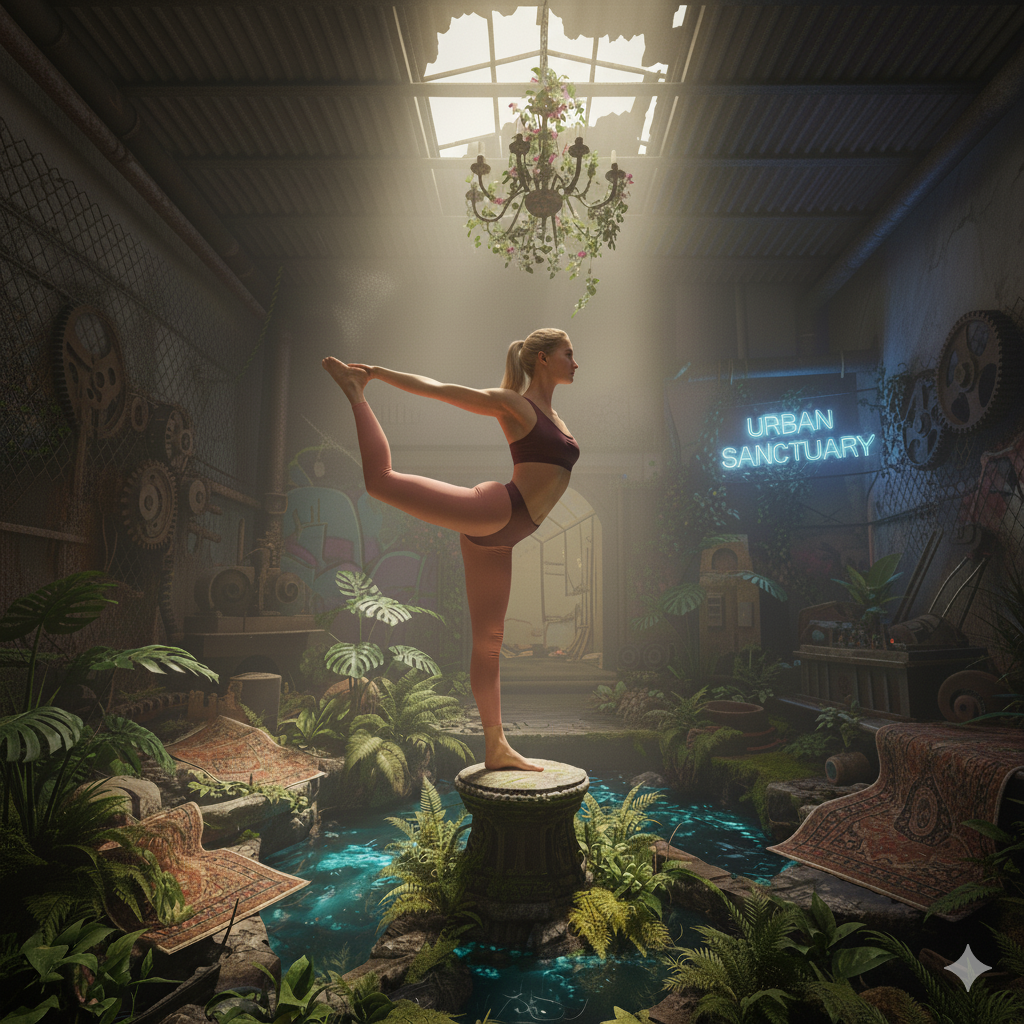

None


In [74]:
print(display(image))

In [78]:

# 사용자에게 보기 제시
print("\n아래 이미지에 가장 적합한 캡션을 선택하세요:\n")

for idx, option in enumerate(all_options, 1):
    print(f"{idx}. {option}")

print("\n" + "=" * 100)

# 사용자 입력 받기
while True:
    try:
        user_choice = int(input("\n번호를 선택하세요 (1-5): "))
        if 1 <= user_choice <= 5:
            selected_caption = all_options[user_choice - 1]
            break
        else:
            print("반드시 1부터 5 사이의 숫자를 입력하세요.")
    except ValueError:
        print("올바른 숫자를 입력하세요.")

print(f"\n사용자 선택한 캡션: {selected_caption}")
print(f"clip이 실제 만든 정답 캡션: {correct_caption}")

# 정답 여부 확인
if selected_caption == correct_caption:
    print("정답입니다!")
else:
    print("오답입니다.")


아래 이미지에 가장 적합한 캡션을 선택하세요:

1. a female in a two-piece bathing suit doing yoga
2. a girl in a bikini performing yoga stretches
3. a lady in swimwear executing a yoga pose
4. a woman in a swimsuit practicing yoga
5. a woman in a bikini top doing a yoga pose
6. a woman in a bikini top doing a yoga pose


사용자 선택한 캡션: a lady in swimwear executing a yoga pose
clip이 실제 만든 정답 캡션: a woman in a bikini top doing a yoga pose
오답입니다.


In [79]:
# 4. CLIP을 이용해 가장 유사도가 높은 캡션 매칭
import torch
import clip

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, clip_processor = clip.load("ViT-B/32", device=device)

# 이미지 전처리
image_tensor = clip_processor(Image.open("./yoga.png")).unsqueeze(0).to(device)

# 캡션들을 토크나이즈
captions_tensor = clip.tokenize(all_options).to(device)

# CLIP으로 유사도 계산
with torch.no_grad():
    logits_per_image, _ = clip_model(image_tensor, captions_tensor)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

# CLIP이 선택한 최적 캡션
clip_best_idx = probs.argmax()
clip_best_caption = all_options[clip_best_idx]

In [ ]:

# 5. 결과 출력
print("=" * 100)

print(f"\n 사용자 선택           : {selected_caption}")
print(f" BLIP 생성 캡션 (정답) : {correct_caption}")
print(f" CLIP 추천 캡션        : {clip_best_caption}")

print(f"\n{'='*100}")
print("CLIP 유사도 점수:")
print(f"{'='*100}")
for idx, (option, prob) in enumerate(zip(all_options, probs[0]), 1):
   
    print(f"CLIP 유사도 점수 > {prob*100:.2f}% | {idx}. {option}")


 사용자 선택           : a lady in swimwear executing a yoga pose
 BLIP 생성 캡션 (정답) : a woman in a bikini top doing a yoga pose
 CLIP 추천 캡션        : a lady in swimwear executing a yoga pose

CLIP 유사도 점수:
CLIP 유사도 점수 > 1.45% | 1. a female in a two-piece bathing suit doing yoga
CLIP 유사도 점수 > 16.66% | 2. a girl in a bikini performing yoga stretches
CLIP 유사도 점수 > 55.37% | 3. a lady in swimwear executing a yoga pose
CLIP 유사도 점수 > 23.57% | 4. a woman in a swimsuit practicing yoga
CLIP 유사도 점수 > 1.48% | 5. a woman in a bikini top doing a yoga pose
CLIP 유사도 점수 > 1.48% | 6. a woman in a bikini top doing a yoga pose


: 